<a href="https://colab.research.google.com/github/maddiejane25/Project-2/blob/dev/mj_mi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
#Upload CSV
from google.colab import files
uploaded = files.upload()

Saving heart_attack_prediction_dataset 2.csv to heart_attack_prediction_dataset 2.csv


In [3]:
#Import the CSV file
MI_df = pd.read_csv('heart_attack_prediction_dataset 2.csv')
MI_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
# Get info
MI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
MI_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [6]:
#Drop the Patient ID column
MI_df = MI_df.drop(columns=['Patient ID'])
MI_df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
# Make the blood pressure column into two columns
MI_df[['Systolic BP', 'Diastolic BP']] = MI_df['Blood Pressure'].str.split('/', expand=True)
MI_df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,Male,208,158/88,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,165/93,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,174/99,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,163/100,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,91/88,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [8]:
# Drop the blood pressure column
MI_df = MI_df.drop(columns=['Blood Pressure'])
MI_df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [9]:
MI_countries = MI_df.copy()

In [10]:
# Create a loop for encoding the Sex, Diet, Country, Continent and Hemisphere columns
for column in MI_df.columns:
  if MI_df[column].dtype == 'object':
    MI_df[column] = MI_df[column].astype('category')
    MI_df[column] = MI_df[column].cat.codes

In [11]:
MI_df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,0,58,39
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,0,65,44
2,21,0,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,0,74,50
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,0,63,0
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,0,82,39


In [12]:
# Use value counts to interogate the continent and country columns
MI_df['Continent'].value_counts()

,count
Continent,
1,2543
3,2241
5,1362
2,884
0,873
4,860


In [13]:
MI_df['Country'].value_counts()

,count
Country,
7,477
0,471
2,462
17,457
1,449
12,448
6,446
3,440
4,436


In [14]:
# The Heart Attack Risk is what we want to predict, use value_counts to see the distribution
MI_df['Heart Attack Risk'].value_counts()

,count
Heart Attack Risk,
0,5624
1,3139


In [15]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
y = MI_df['Heart Attack Risk']
X = MI_df.copy()
X = X.drop(columns=['Heart Attack Risk'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Systolic BP,Diastolic BP
458,67,0,200,91,1,1,1,1,0,18.085760,...,241188,28.949622,292,1,7,5,5,0,87,47
5721,53,1,398,52,1,0,1,1,1,11.507818,...,164350,21.174011,527,7,9,0,5,1,66,5
6901,86,1,124,102,1,0,1,1,1,5.931760,...,212853,22.959020,759,5,7,11,2,1,27,39
1960,78,1,181,80,1,1,1,1,1,17.526963,...,116264,30.578568,643,0,5,13,0,1,25,4
5312,44,0,300,109,1,0,1,1,0,2.005807,...,108288,29.098655,602,2,4,19,1,0,84,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,29,0,399,94,0,0,0,0,1,19.569226,...,229702,27.090726,367,7,4,17,3,0,90,41
7813,70,1,280,88,0,0,1,1,1,11.444464,...,28649,35.338228,304,3,5,7,3,0,78,9
905,79,1,139,77,1,0,1,0,0,18.287451,...,165543,33.154756,257,2,4,18,4,0,87,27
5192,50,1,347,68,1,1,1,0,1,5.172610,...,145549,39.791442,43,0,4,9,3,1,66,22


In [16]:
#Use Standard Scaler on the X data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
display(X_train_scaled)
display(X_test_scaled)

array([[ 0.63587541, -1.52785734, -0.73292935, ..., -0.737189  ,
         1.59988042,  1.487845  ],
       [-0.0250184 ,  0.65451137,  1.7118268 , ...,  1.35650423,
         0.80166086, -1.35502451],
       [ 1.53280274,  0.65451137, -1.67132059, ...,  1.35650423,
        -0.68074689,  0.94634605],
       ...,
       [ 1.20235583,  0.65451137, -1.48611179, ..., -0.737189  ,
         1.59988042,  0.13409762],
       [-0.16663851,  0.65451137,  1.08211688, ...,  1.35650423,
         0.80166086, -0.20433923],
       [ 1.01352902, -1.52785734,  1.60070152, ...,  1.35650423,
        -0.83278872, -1.21964977]])

array([[ 0.1638084 ,  0.65451137, -0.51067879, ..., -0.737189  ,
        -1.17488281, -0.47508871],
       [-1.63004624, -1.52785734,  0.25485091, ...,  1.35650423,
        -0.22462143, -1.42271187],
       [ 1.67442284, -1.52785734,  0.50179598, ..., -0.737189  ,
        -0.79477826,  1.2847829 ],
       ...,
       [ 1.01352902,  0.65451137,  1.14385315, ...,  1.35650423,
        -1.40294554,  0.06641025],
       [-1.20518593,  0.65451137, -0.90579089, ..., -0.737189  ,
        -0.49069462,  0.26947236],
       [-1.34680603, -1.52785734,  0.37832345, ..., -0.737189  ,
         0.87768177, -1.01658766]])

In [17]:
# Import Logistic Regression, Random Forest, Gradient Boost, XG Boost, Decision Tree, SVM and KNN classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Import accuracy score
from sklearn.metrics import accuracy_score
import numpy as np

In [19]:
# Initiate and run a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [20]:
# Get the feature imporant array
feature_importances = model.feature_importances_
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted

[(0.07688879914223948, 'Sedentary Hours Per Day'),
 (0.07650542582030945, 'Exercise Hours Per Week'),
 (0.0757956975374241, 'Income'),
 (0.07535604281447136, 'BMI'),
 (0.07429263429527654, 'Triglycerides'),
 (0.07140979311100712, 'Cholesterol'),
 (0.0676878765145237, 'Systolic BP'),
 (0.06687506527627161, 'Age'),
 (0.06464635452812956, 'Heart Rate'),
 (0.06207865599085231, 'Diastolic BP'),
 (0.04741907420135237, 'Country'),
 (0.03952500678545179, 'Stress Level'),
 (0.03758113861071148, 'Physical Activity Days Per Week'),
 (0.032663764137228025, 'Sleep Hours Per Day'),
 (0.02670629813135876, 'Continent'),
 (0.01822903085567728, 'Diet'),
 (0.010899873465819235, 'Medication Use'),
 (0.010829588055341031, 'Previous Heart Problems'),
 (0.010733947534357847, 'Family History'),
 (0.010325272782722472, 'Obesity'),
 (0.009926487872841975, 'Sex'),
 (0.00968990412103132, 'Diabetes'),
 (0.009568881867059432, 'Alcohol Consumption'),
 (0.00905655962259186, 'Hemisphere'),
 (0.005308826925949914, 'Smo

In [21]:
# Create a loop that runs a prediction of each column alone column using random forest classifier
for column in MI_df.columns:
  if column == 'Heart Attack Risk':
    continue
  y = MI_df['Heart Attack Risk']
  XLoop = MI_df.copy().drop(columns=['Heart Attack Risk'])
  X = XLoop[column].values.reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  model2 = RandomForestClassifier()
  model2.fit(X_train_scaled, y_train)
  y_pred_RFC = model2.predict(X_test_scaled)
  accuracy2 = accuracy_score(y_test, y_pred_RFC)
  print(f"{column} Random Forest accuracy: {np.round(accuracy2,2)}")

Age Random Forest accuracy: 0.65
Sex Random Forest accuracy: 0.65
Cholesterol Random Forest accuracy: 0.63
Heart Rate Random Forest accuracy: 0.65
Diabetes Random Forest accuracy: 0.65
Family History Random Forest accuracy: 0.65
Smoking Random Forest accuracy: 0.65
Obesity Random Forest accuracy: 0.65
Alcohol Consumption Random Forest accuracy: 0.65
Exercise Hours Per Week Random Forest accuracy: 0.55
Diet Random Forest accuracy: 0.65
Previous Heart Problems Random Forest accuracy: 0.65
Medication Use Random Forest accuracy: 0.65
Stress Level Random Forest accuracy: 0.65
Sedentary Hours Per Day Random Forest accuracy: 0.51
Income Random Forest accuracy: 0.55
BMI Random Forest accuracy: 0.53
Triglycerides Random Forest accuracy: 0.57
Physical Activity Days Per Week Random Forest accuracy: 0.65
Sleep Hours Per Day Random Forest accuracy: 0.65
Country Random Forest accuracy: 0.65
Continent Random Forest accuracy: 0.65
Hemisphere Random Forest accuracy: 0.65
Systolic BP Random Forest accur

In [22]:
# Run through multiple ML models using a loop
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XG Boost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {np.round(accuracy,2)}")

Training Logistic Regression...
Logistic Regression accuracy: 0.65
Training Random Forest...
Random Forest accuracy: 0.65
Training Gradient Boosting...
Gradient Boosting accuracy: 0.65
Training XG Boost...
XG Boost accuracy: 0.65
Training Decision Tree...
Decision Tree accuracy: 0.65
Training SVM...
SVM accuracy: 0.65
Training KNN...
KNN accuracy: 0.55


In [23]:
# Create a loop that runs a prediction of each column alone column
for column in MI_df.columns:
  if column == 'Heart Attack Risk':
    continue
  y = MI_df['Heart Attack Risk']
  XLoop = MI_df.copy().drop(columns=['Heart Attack Risk'])
  X = XLoop[column].values.reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  model = LogisticRegression()
  model.fit(X_train_scaled, y_train)
  y_pred_LR = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred_LR)
  print(f"{column} LR accuracy: {np.round(accuracy,2)}")
  model2 = RandomForestClassifier()
  model2.fit(X_train_scaled, y_train)
  y_pred_RFC = model2.predict(X_test_scaled)
  accuracy2 = accuracy_score(y_test, y_pred_RFC)
  print(f"{column} Random Forest accuracy: {np.round(accuracy2,2)}")
  model3 = GradientBoostingClassifier()
  model3.fit(X_train_scaled, y_train)
  y_pred_GB = model3.predict(X_test_scaled)
  accuracy3 = accuracy_score(y_test, y_pred_GB)
  print(f"{column} Gradient Boost accuracy: {np.round(accuracy3,2)}")

Age LR accuracy: 0.65
Age Random Forest accuracy: 0.65
Age Gradient Boost accuracy: 0.65
Sex LR accuracy: 0.65
Sex Random Forest accuracy: 0.65
Sex Gradient Boost accuracy: 0.65
Cholesterol LR accuracy: 0.65
Cholesterol Random Forest accuracy: 0.63
Cholesterol Gradient Boost accuracy: 0.64
Heart Rate LR accuracy: 0.65
Heart Rate Random Forest accuracy: 0.65
Heart Rate Gradient Boost accuracy: 0.65
Diabetes LR accuracy: 0.65
Diabetes Random Forest accuracy: 0.65
Diabetes Gradient Boost accuracy: 0.65
Family History LR accuracy: 0.65
Family History Random Forest accuracy: 0.65
Family History Gradient Boost accuracy: 0.65
Smoking LR accuracy: 0.65
Smoking Random Forest accuracy: 0.65
Smoking Gradient Boost accuracy: 0.65
Obesity LR accuracy: 0.65
Obesity Random Forest accuracy: 0.65
Obesity Gradient Boost accuracy: 0.65
Alcohol Consumption LR accuracy: 0.65
Alcohol Consumption Random Forest accuracy: 0.65
Alcohol Consumption Gradient Boost accuracy: 0.65
Exercise Hours Per Week LR accurac

In [24]:
# Create a function that runs the accuracy score, f1 score, and the AUC score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
def run_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)
  return accuracy, f1, auc

In [25]:
# Use the run_model function in the loop that runs a prediction of each column alone column
for column in MI_df.columns:
  if column == 'Heart Attack Risk':
    continue
  y = MI_df['Heart Attack Risk']
  XLoop = MI_df.copy().drop(columns=['Heart Attack Risk'])
  X = XLoop[column].values.reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  model = LogisticRegression()
  accuracy, f1, auc = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
  print(f"{column} LR accuracy: {np.round(accuracy,2)}")
  print(f"{column} LR f1: {np.round(f1,2)}")
  print(f"{column} LR auc: {np.round(auc,2)}")
  model2 = RandomForestClassifier()
  accuracy, f1, auc = run_model(model2, X_train_scaled, X_test_scaled, y_train, y_test)
  print(f"{column} Random Forest accuracy: {np.round(accuracy,2)}")
  print(f"{column} Random Forest f1: {np.round(f1,2)}")
  print(f"{column} Random Forest auc: {np.round(auc,2)}")
  model3 = GradientBoostingClassifier()
  accuracy, f1, auc = run_model(model3, X_train_scaled, X_test_scaled, y_train, y_test)
  print(f"{column} Gradient Boost accuracy: {np.round(accuracy,2)}")
  print(f"{column} Gradient Boost f1: {np.round(f1,2)}")
  print(f"{column} Gradient Boost auc: {np.round(auc,2)}")
  model4 = XGBClassifier()
  accuracy, f1, auc = run_model(model4, X_train_scaled, X_test_scaled, y_train, y_test)
  print(f"{column} XG Boost accuracy: {np.round(accuracy,2)}")
  print(f"{column} XG Boost f1: {np.round(f1,2)}")
  print(f"{column} XG Boost auc: {np.round(auc,2)}")


Age LR accuracy: 0.65
Age LR f1: 0.0
Age LR auc: 0.5
Age Random Forest accuracy: 0.65
Age Random Forest f1: 0.0
Age Random Forest auc: 0.5
Age Gradient Boost accuracy: 0.65
Age Gradient Boost f1: 0.0
Age Gradient Boost auc: 0.5
Age XG Boost accuracy: 0.65
Age XG Boost f1: 0.0
Age XG Boost auc: 0.5
Sex LR accuracy: 0.65
Sex LR f1: 0.0
Sex LR auc: 0.5
Sex Random Forest accuracy: 0.65
Sex Random Forest f1: 0.0
Sex Random Forest auc: 0.5
Sex Gradient Boost accuracy: 0.65
Sex Gradient Boost f1: 0.0
Sex Gradient Boost auc: 0.5
Sex XG Boost accuracy: 0.65
Sex XG Boost f1: 0.0
Sex XG Boost auc: 0.5
Cholesterol LR accuracy: 0.65
Cholesterol LR f1: 0.0
Cholesterol LR auc: 0.5
Cholesterol Random Forest accuracy: 0.63
Cholesterol Random Forest f1: 0.16
Cholesterol Random Forest auc: 0.51
Cholesterol Gradient Boost accuracy: 0.64
Cholesterol Gradient Boost f1: 0.01
Cholesterol Gradient Boost auc: 0.5
Cholesterol XG Boost accuracy: 0.63
Cholesterol XG Boost f1: 0.1
Cholesterol XG Boost auc: 0.5
Hear

In [26]:
# Use SMOTE to perform oversampling
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [27]:
over_sampler = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)
print(f"Training data before resampling: {Counter(y_train)}")
print(f"Training data resampled: {Counter(y_train_resampled)}")

Training data before resampling: Counter({0: 4210, 1: 2362})
Training data resampled: Counter({1: 4210, 0: 4210})


In [28]:
# Use the resampled data in a Logistic Regression Model
model_resampled = LogisticRegression()
model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = model_resampled.predict(X_test_scaled)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_resampled))


              precision    recall  f1-score   support

           0       0.66      0.50      0.57      1414
           1       0.37      0.53      0.43       777

    accuracy                           0.51      2191
   macro avg       0.51      0.51      0.50      2191
weighted avg       0.56      0.51      0.52      2191



In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      1414
           1       0.35      0.31      0.33       777

    accuracy                           0.55      2191
   macro avg       0.50      0.50      0.50      2191
weighted avg       0.54      0.55      0.55      2191



In [31]:
MI_df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,0,58,39
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,0,65,44
2,21,0,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,0,74,50
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,0,63,0
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,0,82,39


In [32]:
heat_map_df = MI_df.copy()

In [33]:
heat_map_corr = heat_map_df.corr()
heat_map_corr.unstack().sort_values().drop_duplicates()

Continent                Country               -0.444254
Hemisphere               Country               -0.292710
Diastolic BP             Country               -0.032596
Triglycerides            Sleep Hours Per Day   -0.029216
Sedentary Hours Per Day  Continent             -0.027349
                                                  ...   
Continent                Diastolic BP           0.033875
                         Hemisphere             0.220963
Smoking                  Age                    0.394891
                         Sex                    0.514837
Age                      Age                    1.000000
Length: 326, dtype: float64

In [34]:
heat_map_corr.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic BP,Diastolic BP
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.054272,0.057549,0.039308,0.037739,0.039684,0.037102,0.074434,0.036314,0.037557,0.039126,...,0.041123,0.038074,0.040657,0.033274,0.013521,0.028910,0.034767,0.039860,0.041606,0.042212
std,0.207962,0.217355,0.196396,0.196452,0.196061,0.196630,0.226221,0.196793,0.196567,0.196189,...,0.195801,0.196514,0.195843,0.197446,0.226582,0.221673,0.210256,0.196089,0.195952,0.195815
min,-0.014105,-0.021835,-0.024487,-0.016436,-0.014105,-0.021608,-0.016300,-0.024195,-0.024195,-0.023414,...,-0.011492,-0.029216,-0.011139,-0.029216,-0.444254,-0.444254,-0.292710,-0.018528,-0.022223,-0.032596
25%,-0.003582,-0.006992,-0.006973,-0.004854,-0.002603,-0.008562,-0.005081,-0.008444,-0.007112,-0.006827,...,-0.003193,-0.005919,-0.004740,-0.011169,-0.008092,-0.010669,-0.008803,-0.004216,-0.004035,-0.002734
50%,0.001093,0.002133,0.001889,0.000905,0.001172,-0.001548,0.002768,-0.001388,0.001839,0.001908,...,0.000766,0.001592,0.001489,-0.005321,0.003059,-0.001240,-0.000297,0.002665,0.003443,0.007267
75%,0.006098,0.003460,0.015283,0.006397,0.009514,0.007778,0.012502,0.004862,0.006014,0.007244,...,0.008654,0.009558,0.009305,0.001690,0.015937,0.005794,0.009987,0.008821,0.010446,0.011265
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
heat_map_corr_df = pd.DataFrame(heat_map_corr.unstack().sort_values())
heat_map_corr_df.head()


,,0
Continent,Country,-0.444254
Country,Continent,-0.444254
Hemisphere,Country,-0.292710
Country,Hemisphere,-0.292710
Diastolic BP,Country,-0.032596


In [36]:
# prompt: Using dataframe heat_map_corr_df: i don't care about the correlation score of 0.0-0.19, lets get rid of those

# Assuming 'heat_map_corr_df' is your DataFrame and the correlation scores are in column '0'.
# We filter out the rows where the absolute value of correlation is less than or equal to 0.19.

heat_map_corr_df = heat_map_corr_df[abs(heat_map_corr_df[0]) > 0.19]
heat_map_corr_df


,,0
Continent,Country,-0.444254
Country,Continent,-0.444254
Hemisphere,Country,-0.292710
Country,Hemisphere,-0.292710
Continent,Hemisphere,0.220963
Hemisphere,Continent,0.220963
Smoking,Age,0.394891
Age,Smoking,0.394891
Smoking,Sex,0.514837
Sex,Smoking,0.514837


In [37]:
# Drop the rows with a correlation score of 1.0
heat_map_corr_df = heat_map_corr_df[heat_map_corr_df[0] != 1.0]
heat_map_corr_df

,,0
Continent,Country,-0.444254
Country,Continent,-0.444254
Hemisphere,Country,-0.292710
Country,Hemisphere,-0.292710
Continent,Hemisphere,0.220963
Hemisphere,Continent,0.220963
Smoking,Age,0.394891
Age,Smoking,0.394891
Smoking,Sex,0.514837
Sex,Smoking,0.514837


In [38]:
# Drop the rows with the same number in column 0
heat_map_corr_df = heat_map_corr_df[heat_map_corr_df.index.get_level_values(0) != heat_map_corr_df.index.get_level_values(1)]
heat_map_corr_df

,,0
Continent,Country,-0.444254
Country,Continent,-0.444254
Hemisphere,Country,-0.292710
Country,Hemisphere,-0.292710
Continent,Hemisphere,0.220963
Hemisphere,Continent,0.220963
Smoking,Age,0.394891
Age,Smoking,0.394891
Smoking,Sex,0.514837
Sex,Smoking,0.514837


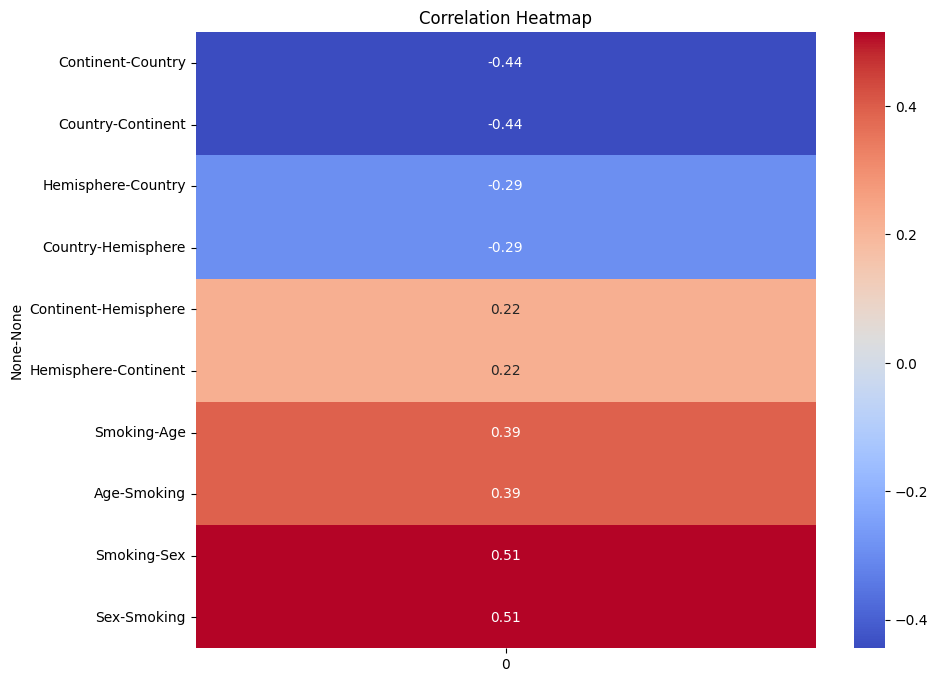

In [40]:
# Create a heat map with heat_map_corr_df
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(heat_map_corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


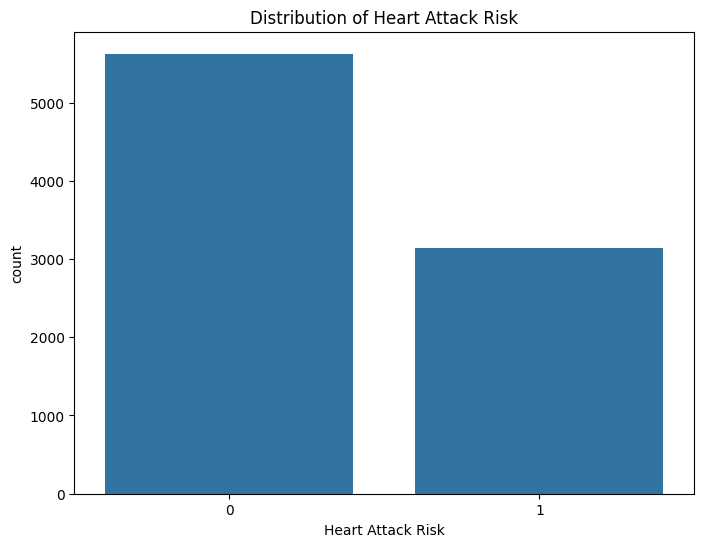

<Figure size 640x480 with 0 Axes>

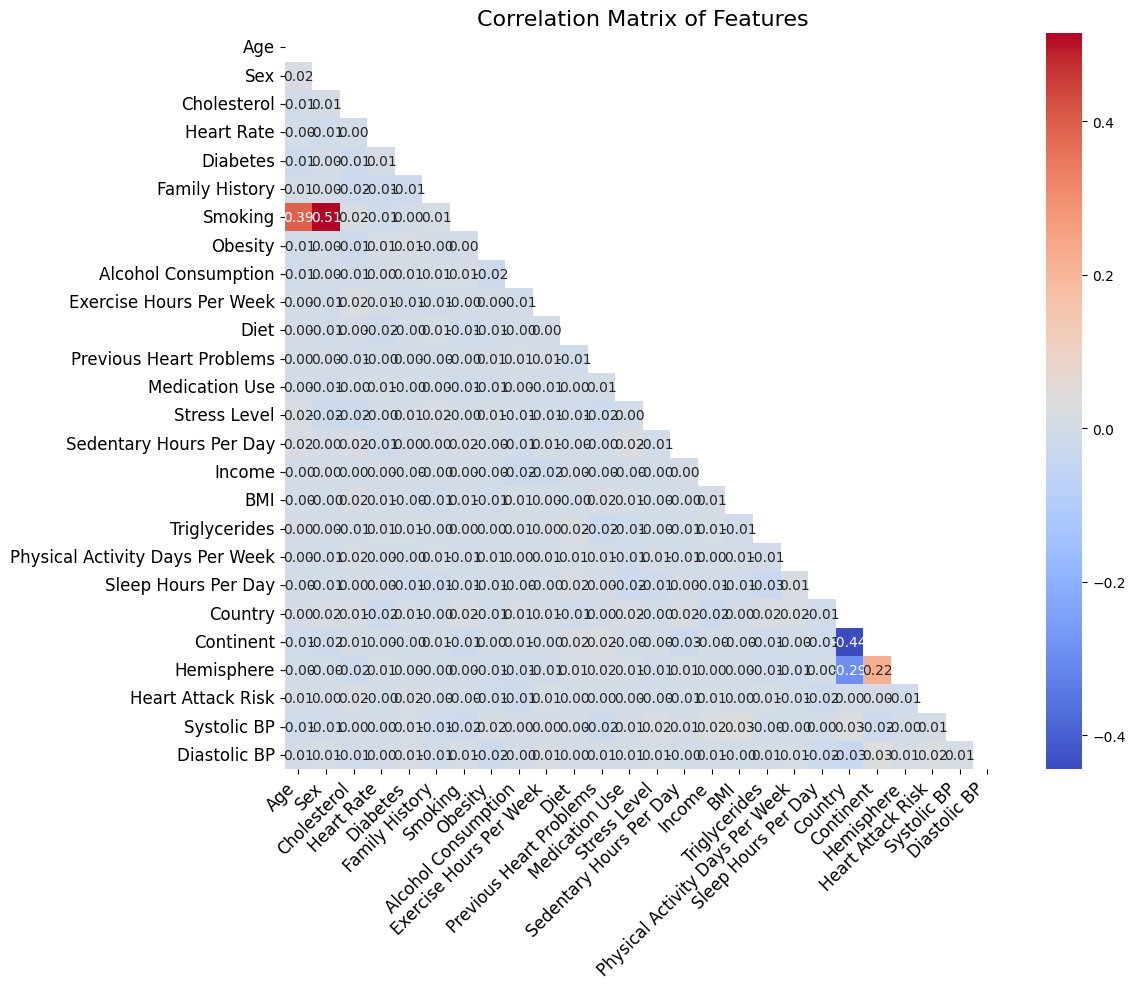

<Figure size 640x480 with 0 Axes>

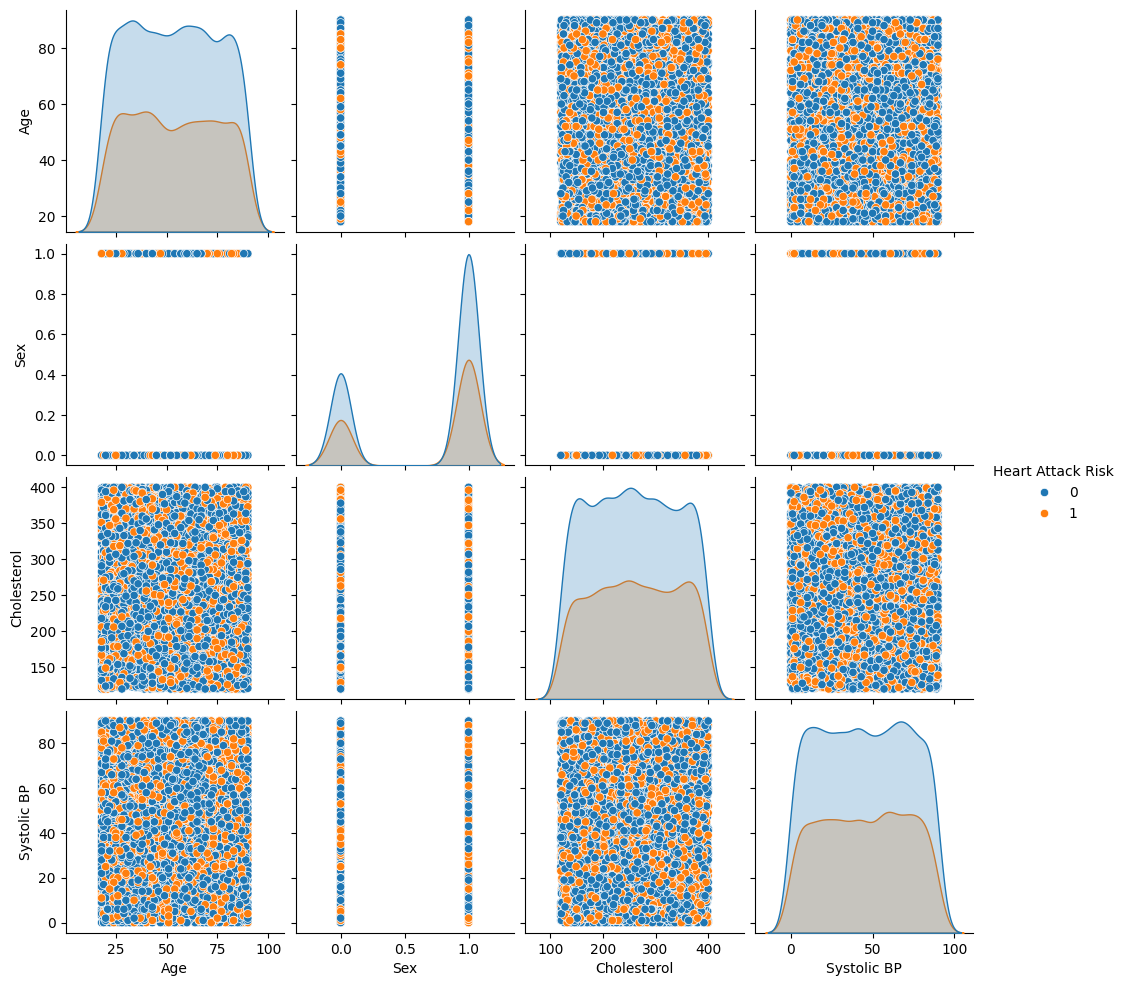

<Figure size 640x480 with 0 Axes>

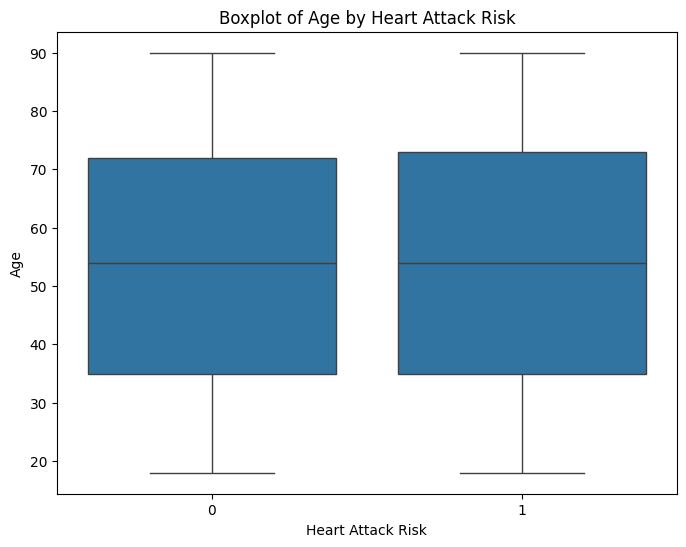

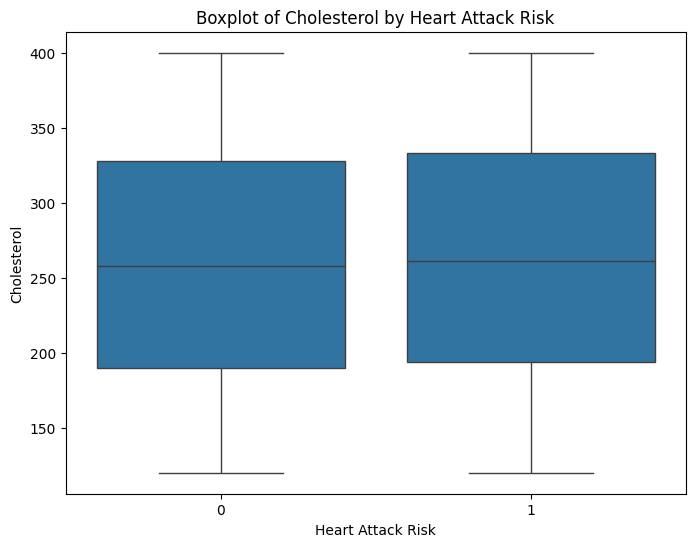

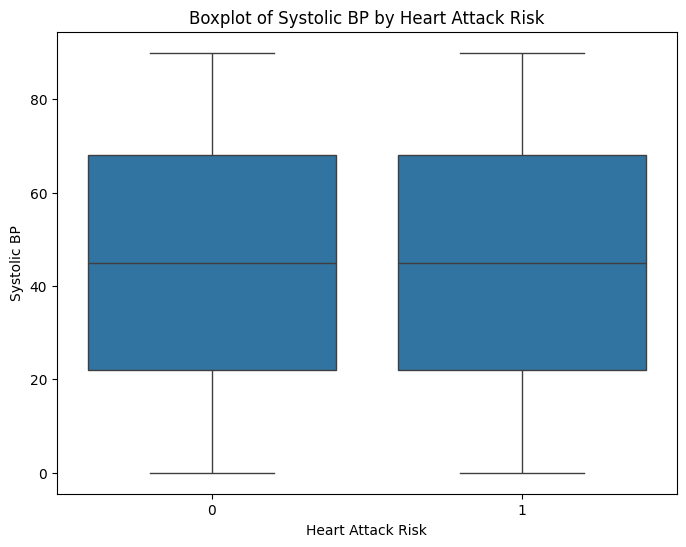

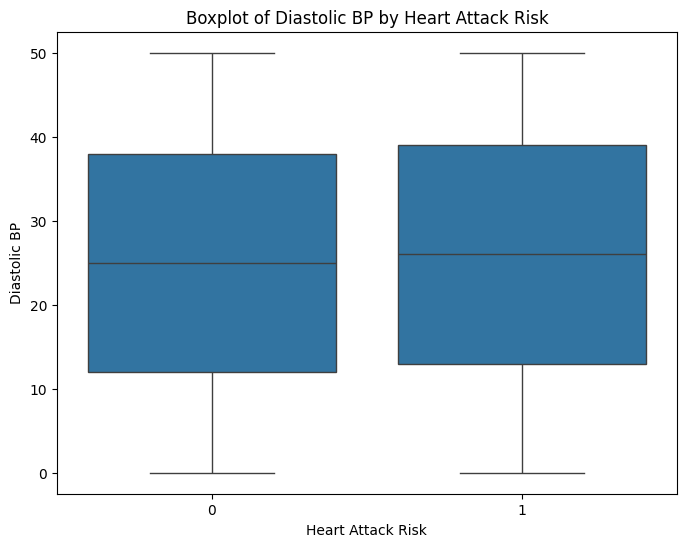

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Heart Attack Risk
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Attack Risk', data=MI_df)
plt.title('Distribution of Heart Attack Risk')
plt.show()
plt.savefig('heart_attack_risk_distribution.png')

# 2. Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(MI_df.corr(), dtype=bool))
sns.heatmap(MI_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('correlation_matrix.png')

# 3. Pairplot for selected features
selected_features = ['Age', 'Sex', 'Cholesterol', 'Systolic BP', 'Heart Attack Risk'] #Example
sns.pairplot(MI_df[selected_features], hue='Heart Attack Risk', diag_kind='kde')
plt.show()
plt.savefig('pairplot.png')

# 4. Boxplots for numerical features
numerical_features = ['Age', 'Cholesterol', 'Systolic BP', 'Diastolic BP'] # Example
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Heart Attack Risk', y=col, data=MI_df)
    plt.title(f'Boxplot of {col} by Heart Attack Risk')
    plt.show()
plt.savefig('boxplots.png')

In [ ]:
# Create a bar plot to compare smoking status with heart attack risk
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', hue='Heart Attack Risk', data=MI_df)
plt.title('Heart Attack Risk vs. Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()
plt.savefig('smoking_heart_attack.png')

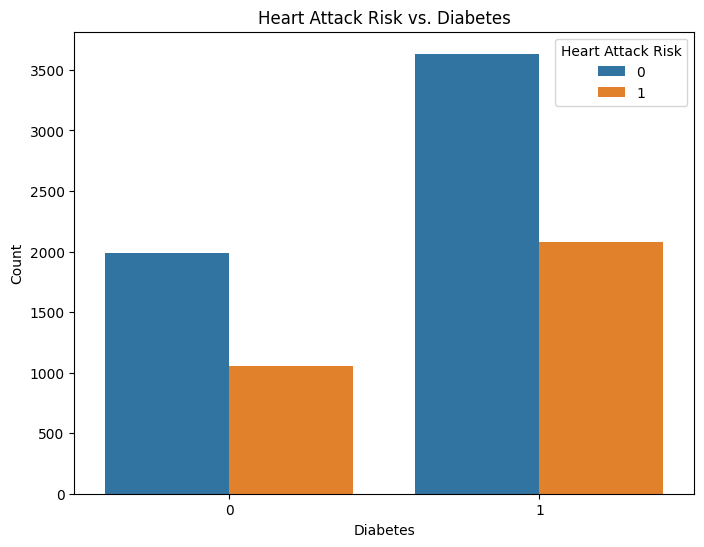

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a bar plot to compare diabetes with heart attack risk
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes', hue='Heart Attack Risk', data=MI_df)
plt.title('Heart Attack Risk vs. Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()
plt.savefig('diabetes_heart_attack.png')

In [42]:
import pandas as pd

# Assuming MI_countries is your dataframe
country_risk = MI_countries.groupby('Country')['Heart Attack Risk'].mean().reset_index()
# Calculate average risk for each country
country_risk.head()

,Country,Heart Attack Risk
0,Argentina,0.369427
1,Australia,0.374165
2,Brazil,0.352814
3,Canada,0.359091
4,China,0.355505


In [44]:
import plotly.express as px

fig = px.choropleth(country_risk, locations='Country', locationmode='country names',
                    color='Heart Attack Risk',
                    color_continuous_scale="Viridis",  # Or any other sequential scale
                    range_color=[0, 1],  # Set color range to 0-1 for risk proportion
                    hover_name='Country',
                    title='Average Heart Attack Risk by Country')

fig.show()
# Save the plotly figure as an HTML file
fig.write_html("choropleth_map.html")

# Download the HTML file
files.download("choropleth_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px

# Assuming 'MI_df' and 'Country' column are defined as in your provided code

# Create the choropleth map
fig = px.choropleth(MI_countries, locations='Country',
                    locationmode='country names',
                    color='Heart Attack Risk',  # Replace with the column you want to visualize
                    hover_name='Country',
                    title='Heart Attack Risk by Country')

fig.show()
# Save the plotly figure as an HTML file
fig.write_html("choropleth_map.html")

# Download the HTML file
files.download("choropleth_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>